# Tinanic Survival

* Dataset has been obtained from kaggle.com

## Data Analysis

In [1]:
import numpy as np
import pandas as pd

#load the files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
data = pd.concat([train, test])

#size of training dataset
train_samples = train.shape[0]

#print some of them
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [2]:
#show the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [3]:
#show the distributions
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [4]:
#show categorical
data.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


In [5]:
#showing survival percentiles
train['Survived'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    0.0
0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    1.0
0.8    1.0
0.9    1.0
1.0    1.0
Name: Survived, dtype: float64

In [6]:
#showing fare percentiles
data['Fare'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.00000
0.1      7.56750
0.2      7.85420
0.3      8.05000
0.4     10.50000
0.5     14.45420
0.6     21.67920
0.7     26.95500
0.8     41.57920
0.9     78.05082
1.0    512.32920
Name: Fare, dtype: float64

## Normalizing and selecting useful data

In [7]:
#Dropping useless features
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,0,3,male,1,0.0
1,38.0,C85,C,71.2833,0,1,female,1,1.0
2,26.0,NaN,S,7.9250,0,3,female,0,1.0
3,35.0,C123,S,53.1000,0,1,female,1,1.0
4,35.0,NaN,S,8.0500,0,3,male,0,0.0


In [8]:
#New column to know if the passenger has family on board
def processFamily(df):
    df['Parch'] = (df['Parch'] > 0).apply(lambda x: 'yes' if x == 1 else 'no')
    df['SibSp'] = (df['SibSp'] > 0).apply(lambda x: 'yes' if x == 1 else 'no')

processFamily(data)
data.head(10)

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,no,3,male,yes,0.0
1,38.0,C85,C,71.2833,no,1,female,yes,1.0
2,26.0,NaN,S,7.9250,no,3,female,no,1.0
3,35.0,C123,S,53.1000,no,1,female,yes,1.0
4,35.0,NaN,S,8.0500,no,3,male,no,0.0
5,NaN,NaN,Q,8.4583,no,3,male,no,0.0
6,54.0,E46,S,51.8625,no,1,male,no,0.0
7,2.0,NaN,S,21.0750,yes,3,male,yes,0.0
8,27.0,NaN,S,11.1333,yes,3,female,no,1.0
9,14.0,NaN,C,30.0708,no,2,female,yes,1.0


In [9]:
#Get information from Cabin
def getCabinLetter(cabin):
    letter = "U"
    if isinstance(cabin,str) and cabin != "":        
        letter = cabin.split()[0][0]
    return letter

def getCabinPos(cabin):
    num = 0
    if isinstance(cabin,str) and cabin != "":        
        snum = cabin.split()[0][1:]
        num = int(snum) if snum else 0
    return num

def processCabin(df):
    df['CabinLetter'] = df['Cabin'].apply(getCabinLetter)
    df['CabinPos'] = df['Cabin'].apply(getCabinPos)

processCabin(data)
print(data[['Cabin','CabinLetter','CabinPos']].head(10))

  Cabin CabinLetter  CabinPos
0   NaN           U         0
1   C85           C        85
2   NaN           U         0
3  C123           C       123
4   NaN           U         0
5   NaN           U         0
6   E46           E        46
7   NaN           U         0
8   NaN           U         0
9   NaN           U         0


In [10]:
#Transform categorical to dummies
data = pd.get_dummies(data)

In [11]:
#finding NaN
data.columns[data.isnull().any()].tolist()

['Age', 'Fare', 'Survived']

In [12]:
#Replace the NaN value with the mean (careful at Survided from test -> data[891:])
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

data.columns[data.isnull().any()].tolist()

['Survived']

### Normalizing

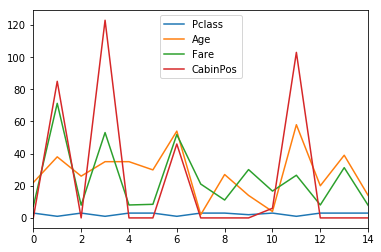

In [13]:
import matplotlib.pyplot as plt

data[['Pclass','Age','Fare','CabinPos']].head(15).plot()
plt.show()

Train shape: (1309, 208)


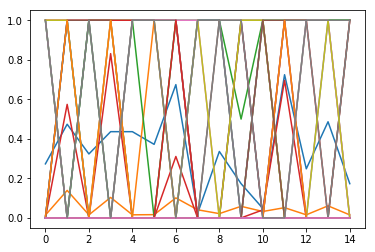

In [14]:
#Squeeze the data to [0,1]
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data_norm = scaler.fit_transform(data.drop('Survived', axis=1))

print("Train shape: {}".format(data_norm.shape))

plt.figure()
plt.plot(np.arange(15), data_norm[:15])
plt.show()

### Splitting the data to train and test

In [15]:
y = np.array(data['Survived'])
X = np.array(data.drop('Survived', axis=1))

#using the previous scaler
X_norm = scaler.transform(X)

#split by idx
idx = train_samples
X_train, X_test = X_norm[:idx], X_norm[idx:]
y_train, y_test = y[:idx], y[idx:]

print("Shape train: {}".format(X_train.shape))
print("Shape test: {}".format(X_test.shape))
print(y_train[0:1])
print(X_train[0:1].tolist())

Shape train: (891, 208)
Shape test: (418, 208)
[ 0.]
[[0.2734560942001754, 0.014151057562208049, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
y_val = np.reshape(y_val, [-1,1])
y_train = np.reshape(y_train, [-1,1])

print("Shape X train: {}".format(X_train.shape))
print("Shape y train: {}".format(y_train.shape))
print("Shape X validation: {}".format(X_val.shape))
print("Shape y validation: {}".format(y_val.shape))

Shape X train: (712, 208)
Shape y train: (712, 1)
Shape X validation: (179, 208)
Shape y validation: (179, 1)


## Neural Network (model)
### Tensorflow

_(Not converve very well, by now)_

In [17]:
import tensorflow as tf

inputs_len = X_train.shape[1]
outputs_len = y_train.shape[1]

inputs = tf.placeholder(tf.float32, [None, inputs_len])
outputs = tf.placeholder(tf.int32, [None, outputs_len])


def nn_layer(inputs_, num_outputs):
    weights_init = tf.truncated_normal_initializer(stddev=1/np.sqrt(inputs_len), seed=42)
    bias_init = tf.truncated_normal_initializer(stddev=1/np.sqrt(num_outputs), seed=42)

    return tf.layers.dense(inputs_,
                             num_outputs, 
                             activation=tf.nn.sigmoid, 
                             kernel_initializer=weights_init,
                             bias_initializer=bias_init)

    
logits = nn_layer(inputs, outputs_len)

cost = tf.reduce_mean(tf.square(tf.to_float(outputs) - logits))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

correct_predition = tf.equal(outputs, tf.cast(logits, tf.int32))
accuracy = tf.reduce_mean(tf.cast(correct_predition, tf.float32))

##
epochs = 500
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        t_acc, _, loss = sess.run([accuracy, optimizer, cost], feed_dict={inputs: X_train, outputs: y_train})
        
        if epoch % 100 == 0:
            print("Epoch({:2}) Training Loss: {:.5f}".format(epoch, loss))   
        
    v_acc = sess.run(accuracy, feed_dict={inputs: X_val, outputs: y_val})    
    print("Training accuracy: {:.5f}  Validation Accuracy: {}".format(t_acc, v_acc))
    


Epoch( 0) Training Loss: 0.23159
Epoch(100) Training Loss: 0.12915
Epoch(200) Training Loss: 0.11659
Epoch(300) Training Loss: 0.11241
Epoch(400) Training Loss: 0.11044
Training accuracy: 0.63764  Validation Accuracy: 0.5307262539863586


### Scikit-learn

_(Searh a way to improve it)_

In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    learning_rate_init=1e-3, 
                    learning_rate='adaptive',
                    shuffle=True,
                    #batch_size=100,
                    max_iter=5000,
                    tol=1e-5,
                    hidden_layer_sizes=(8,8),
                    #warm_start=True,
                    random_state=42,
                    verbose=True)

clf.fit(X_train, y_train.reshape(-1))


#Scores
print("Training score: {}".format(clf.score(X_train, y_train)))
print("Validation score: {}".format(clf.score(X_val, y_val)))

Training score: 0.9185393258426966
Validation score: 0.7541899441340782


### Metrics (scikit-learn)

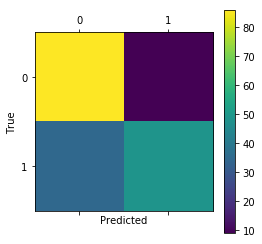

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = clf.predict(X_val)
cm = confusion_matrix(y_val, predictions)

plt.matshow(cm)
plt.colorbar()
ax = plt.gca()
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

plt.show()

In [20]:
print(classification_report(y_val, predictions))

             precision    recall  f1-score   support

        0.0       0.71      0.91      0.80        95
        1.0       0.84      0.58      0.69        84

avg / total       0.77      0.75      0.75       179



## Get Predictions

In [21]:
predictions = clf.predict(X_test)

passengerId = 892
print("PassengerId,Survived")
for i in range(len(X_test)):
    print("{},{}".format(passengerId, (int)(predictions[i])))
    passengerId += 1

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,1
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,1
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,0
926,0
927,0
928,0
929,0
930,0
931,0
932,0
933,1
934,0
935,1
936,1
937,0
938,1
939,0
940,1
941,0
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,1
960,0
961,1
962,1
963,0
964,0
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,0
973,0
974,1
975,0
976,0
977,0
978,1
979,0
980,1
981,1
982,0
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,0
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,0
1015,0
1016,0
1017,0
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,1
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,0
1046,0
10